In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import yfinance as yf 

# Load dataset
data = yf.download('AAPL',start='2014-01-01',end='2024-01-01')



[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273228,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893799,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985926,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864445,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971252,258529600
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [4]:
data = data[['Close']]

In [5]:
data

,Close
Date,
2014-01-02,19.754642
2014-01-03,19.320715
2014-01-06,19.426071
2014-01-07,19.287144
2014-01-08,19.409286
...,...
2023-12-22,193.600006
2023-12-26,193.050003
2023-12-27,193.149994


In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

time_step = 100
#time_step = 100 means that for each prediction, the model looks at the previous 100 days of stock prices.

# Prepare the data
#For each point in the dataset, a sequence of the previous 100 days' close values is taken as input (X), and the stock price on the 101st day is taken as the corresponding target value (y).


X, y = [], []
for i in range(len(scaled_data) - time_step):
    X.append(scaled_data[i:i + time_step, 0])
    y.append(scaled_data[i + time_step, 0])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)



In [7]:
X 

array([[0.01057001, 0.00816279, 0.00874725, ..., 0.02129653, 0.02265568,
        0.02493413],
       [0.00816279, 0.00874725, 0.00797655, ..., 0.02265568, 0.02493413,
        0.02461316],
       [0.00874725, 0.00797655, 0.00865414, ..., 0.02493413, 0.02461316,
        0.02686585],
       ...,
       [0.910574  , 0.89315479, 0.89842491, ..., 0.98097196, 0.97498071,
        0.97192956],
       [0.89315479, 0.89842491, 0.8894934 , ..., 0.97498071, 0.97192956,
        0.97248426],
       [0.89842491, 0.8894934 , 0.88827294, ..., 0.97192956, 0.97248426,
        0.97486974]])

In [8]:
y

array([0.02461316, 0.02686585, 0.02639432, ..., 0.97248426, 0.97486974,
       0.96904483])

In [9]:
# Reshape X to fit LSTM requirements [no. of samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


c:\Users\vshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0258 - val_loss: 0.0078
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 5.8948e-04 - val_loss: 0.0020
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.8651e-04 - val_loss: 0.0019
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 2.1045e-04 - val_loss: 0.0014
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 2.3387e-04 - val_loss: 0.0011
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 2.0582e-04 - val_loss: 0.0011
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 2.1706e-04 - val_loss: 0.0011
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 2.1221e-04 - val_loss: 0.0011
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 2.3862e-04 - val_loss: 0.0012
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 2.0854e-04 - val_loss: 0.0010
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 1.9436e-04 - val_loss: 8.9111e-04
Epoch 12/

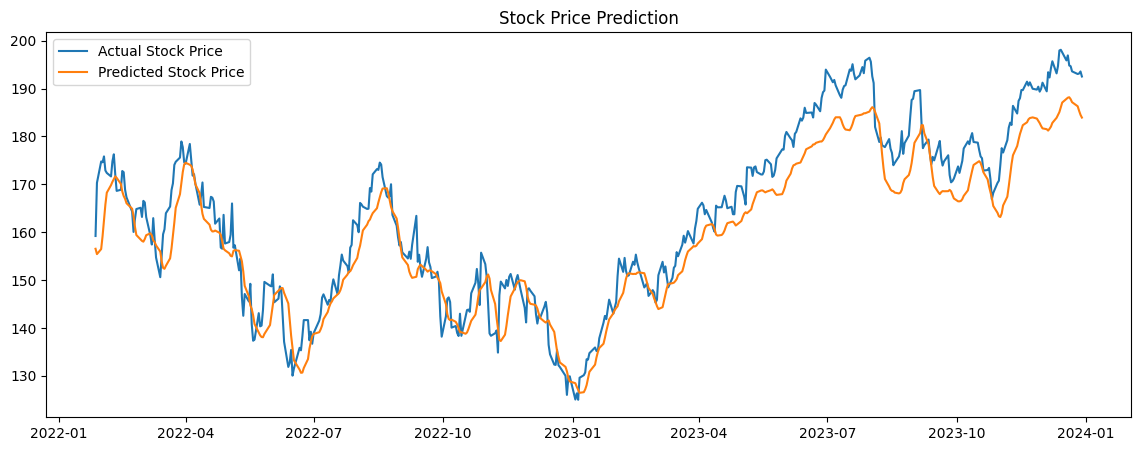

In [11]:


# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))


#The model will use the Adam optimizer to update its weights during training. Adam adjusts the learning rate for each parameter individually, making the training process more efficient and often leading to better performance.
#The model will use Mean Squared Error to measure the difference between the predicted values and the actual values. This helps the model understand how far off its predictions are and guides it to adjust its parameters to minimize these errors.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)


# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test to its original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))        #reshape gives us a 2D array with one column and as many rows as required. 


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Stock Price')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

Imagine last_100_days as a list containing the prices for the last 100 days.
This line removes the price of the oldest day (index 0) from the list.
Then, it adds the predicted price for the next day to the end of the list.
This way, the last_100_days list always maintains the most recent 100 days of price data, including the newly predicted price.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━

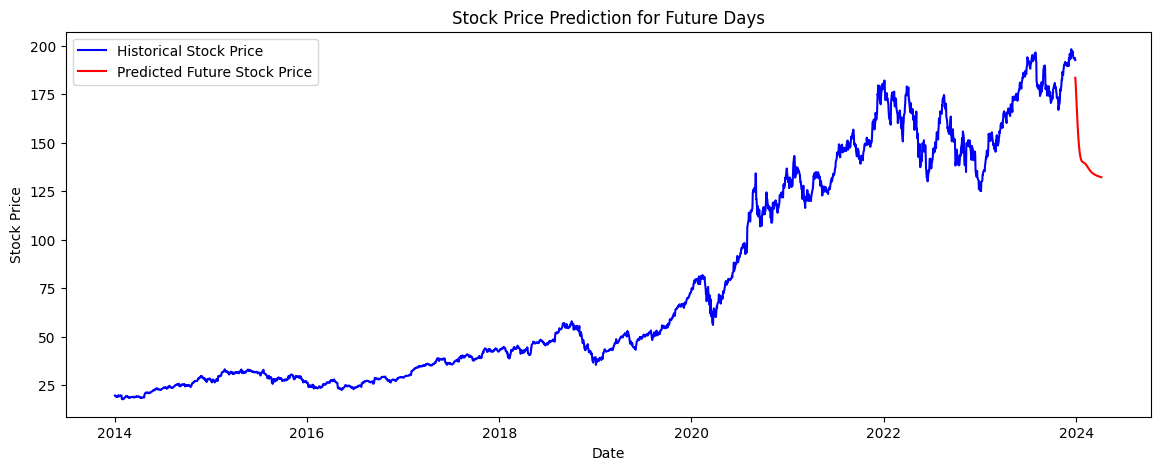

In [20]:
future_days = 100  # Number of future days to predict
last_100_days = scaled_data[-time_step:]  # Last 100 days of data

predicted_future_prices = []

for _ in range(future_days):
    x_input = last_100_days.reshape((1, time_step, 1)) #the 1 here represents one prediction , for 100 days ie timestep, with 1 feature ie closing price
    predicted_price = model.predict(x_input)
    predicted_future_prices.append(predicted_price[0, 0])
    
    # Append the predicted price to last_100_days and remove the first value
    last_100_days = np.append(last_100_days[1:], predicted_price)

# Inverse transform to get actual prices

predicted_future_prices = scaler.inverse_transform(np.array(predicted_future_prices).reshape(-1, 1))

# Generate future dates for the prediction
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_days)

# Plot the future predictions with dates on x-axis
plt.figure(figsize=(14, 5))
plt.plot(data.index, data, color='blue', label='Historical Stock Price')
plt.plot(future_dates, predicted_future_prices, color='red', label='Predicted Future Stock Price')
plt.title('Stock Price Prediction for Future Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()